# Sentiment Analysis in Poetry

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
import spacy

In [47]:
import os
import pathlib
import re

In [48]:
forms_dir = pathlib.Path(os.path.join('Data', 'forms'))
topics_dir = pathlib.Path(os.path.join('Data', 'topics'))

In [49]:
def create_Dataset(data, types_dir, unk):
    for type in types_dir.iterdir():
        if type.is_dir():
            for file in type.iterdir():
                if file.is_file() and not file.name.startswith('.'): #unfortunately i use a mac
                    with file.open('r') as f:
                        text = f.read()
                        data.append({
                            'topics/forms': unk,   
                            'genre': str(type).rsplit('/')[-1],
                            'file': str(file).rsplit('/')[-1][:-4],
                            'text': text
                        })

In [50]:
data = []
create_Dataset(data, forms_dir, 'forms')
create_Dataset(data, topics_dir, 'topics')

In [51]:
df = pd.DataFrame(data)
df['genre'] = df['genre'].str.capitalize()
df.head()

,topics/forms,genre,file,text
0,forms,Burlesque,BurlesquePoemsBurlesquePoembySamuelJohnson,Of the modern versifications of\nancient legen...
1,forms,Burlesque,BurlesquePoemsBurlesque1725PoembyAlexandreNodo...,Dear beautiful lady\nthe poor devil very humbl...
2,forms,Burlesque,BurlesquePoemsBurlesqueWeddingRiceAndSatinRose...,Love is grand in the beginning…\nWhen he’s mod...
3,forms,Burlesque,BurlesquePoemsBurlesqueSonnetToABeePoembyThoma...,Sweet Insect! that on two small wings doth fly...
4,forms,Burlesque,BurlesquePoemsBurlesquePoembyRaymondFarrell,"i can't think of anything\nMore boring, stupif..."


In [52]:
def remove_prefix(data):
    prefix = f"{data['genre'].replace('-', '')}Poems"
    return data['file'].removeprefix(prefix)

df['file'] = df.apply(remove_prefix, axis=1)

In [53]:
df.head()

,topics/forms,genre,file,text
0,forms,Burlesque,BurlesquePoembySamuelJohnson,Of the modern versifications of\nancient legen...
1,forms,Burlesque,Burlesque1725PoembyAlexandreNodopaka,Dear beautiful lady\nthe poor devil very humbl...
2,forms,Burlesque,BurlesqueWeddingRiceAndSatinRosesPoembyCarylRa...,Love is grand in the beginning…\nWhen he’s mod...
3,forms,Burlesque,BurlesqueSonnetToABeePoembyThomasGent,Sweet Insect! that on two small wings doth fly...
4,forms,Burlesque,BurlesquePoembyRaymondFarrell,"i can't think of anything\nMore boring, stupif..."


In [54]:
def extract_author(data):
    list = re.findall('[A-Z][^A-Z]*', data)
    return ' '.join(list[-2:])

df['author'] = df['file'].apply(extract_author)

In [55]:
def extract_title(data):
    list = re.findall('[A-Z][^A-Z]*', data)
    return ' '.join(list[:-3])

df['title'] = df['file'].apply(extract_title)

In [56]:
df.head()

,topics/forms,genre,file,text,author,title
0,forms,Burlesque,BurlesquePoembySamuelJohnson,Of the modern versifications of\nancient legen...,Samuel Johnson,Burlesque
1,forms,Burlesque,Burlesque1725PoembyAlexandreNodopaka,Dear beautiful lady\nthe poor devil very humbl...,Alexandre Nodopaka,Burlesque1725
2,forms,Burlesque,BurlesqueWeddingRiceAndSatinRosesPoembyCarylRa...,Love is grand in the beginning…\nWhen he’s mod...,Caryl Ramsdale,Burlesque Wedding Rice And Satin Roses
3,forms,Burlesque,BurlesqueSonnetToABeePoembyThomasGent,Sweet Insect! that on two small wings doth fly...,Thomas Gent,Burlesque Sonnet To A Bee
4,forms,Burlesque,BurlesquePoembyRaymondFarrell,"i can't think of anything\nMore boring, stupif...",Raymond Farrell,Burlesque


In [62]:
def format_text(data):
    return data.replace('\n', ' <NEXTLINE> ')

df['text'] = df['text'].apply(format_text)


In [72]:
num_unique_authors = df['author'].nunique()

print("Number of Authors: " + str(num_unique_authors))

Number of Authors: 5344


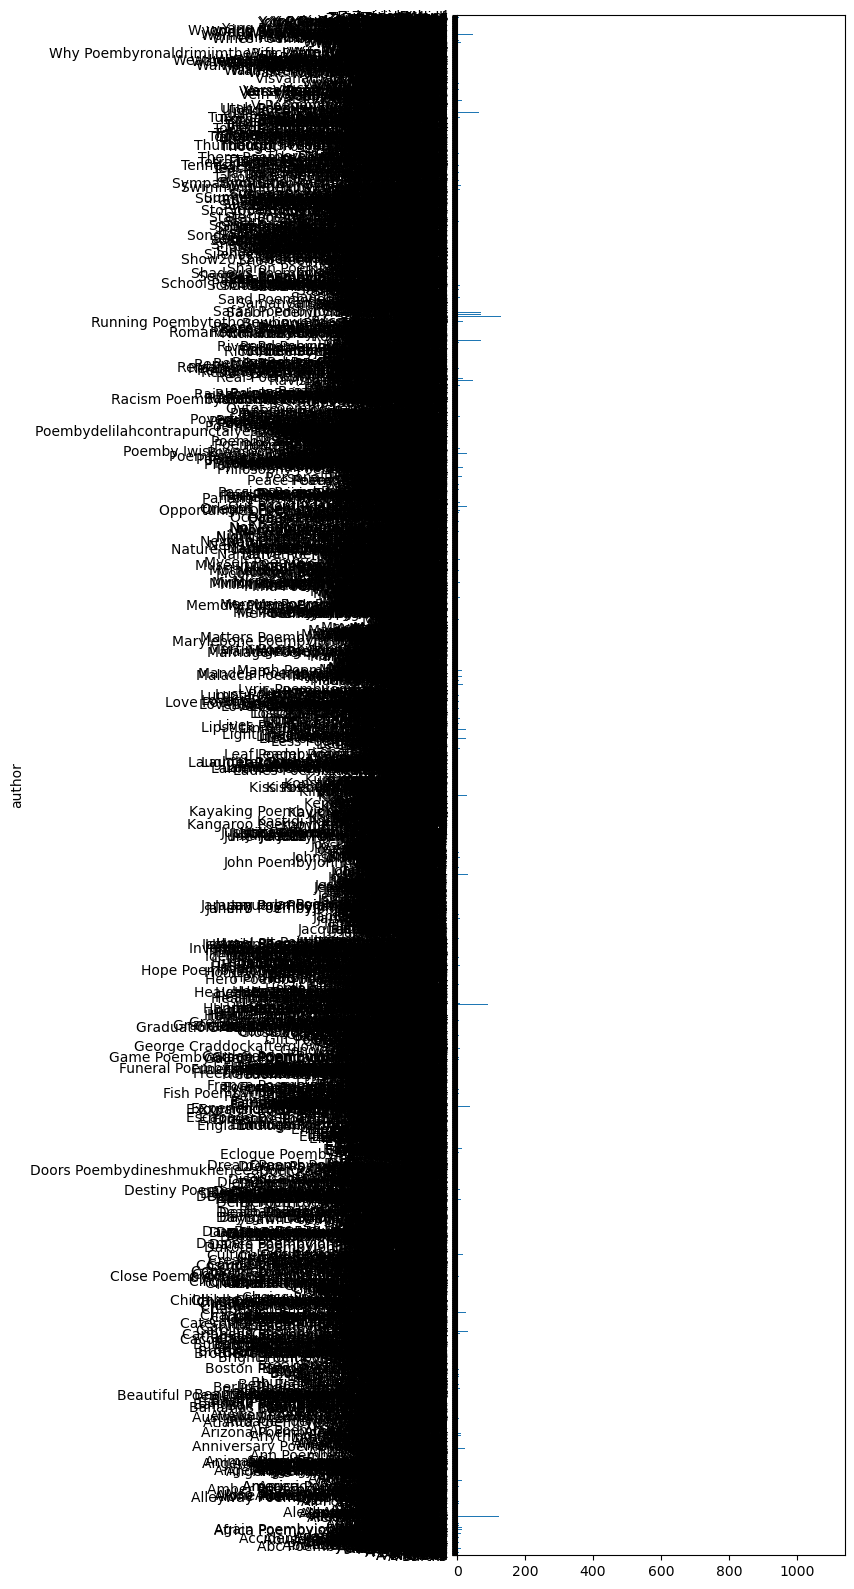

In [70]:
df.groupby('author').file.count().plot(kind='barh', figsize=(5,20))
plt.show()

### Learning

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score

In [36]:
df = pd.read_csv('./IMDB Dataset.csv')
df.columns = ['Review', 'Sentiment']
X = df['Review']
y = df['Sentiment']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

test_x_vectors = vectorizer.transform(X_test)

In [39]:
clf_log = make_pipeline(StandardScaler(with_mean=False), LogisticRegression())
clf_log.fit(X_train_vectors, y_train)

/Users/foluwaaderibigbe/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])

In [40]:
clf_log.predict(test_x_vectors)

array(['negative', 'positive', 'negative', ..., 'positive', 'positive',
       'negative'], dtype=object)

In [41]:
print(clf_log.score(test_x_vectors, y_test))

0.8635151515151516


In [42]:
f1_score(y_test, clf_log.predict(test_x_vectors), average=None, labels=['positive', 'negative'])

array([0.86508507, 0.86190827])

Applying results

In [63]:
text_transformed = vectorizer.transform(df['text'])

In [64]:
predictions = clf_log.predict(text_transformed)


In [65]:
df['predictions'] = predictions

In [66]:
df.head()

,topics/forms,genre,file,text,author,title,predictions
0,forms,Burlesque,BurlesquePoembySamuelJohnson,Of the modern versifications of <NEXTLINE> anc...,Samuel Johnson,Burlesque,positive
1,forms,Burlesque,Burlesque1725PoembyAlexandreNodopaka,Dear beautiful lady <NEXTLINE> the poor devil ...,Alexandre Nodopaka,Burlesque1725,negative
2,forms,Burlesque,BurlesqueWeddingRiceAndSatinRosesPoembyCarylRa...,Love is grand in the beginning… <NEXTLINE> Whe...,Caryl Ramsdale,Burlesque Wedding Rice And Satin Roses,positive
3,forms,Burlesque,BurlesqueSonnetToABeePoembyThomasGent,Sweet Insect! that on two small wings doth fly...,Thomas Gent,Burlesque Sonnet To A Bee,negative
4,forms,Burlesque,BurlesquePoembyRaymondFarrell,i can't think of anything <NEXTLINE> More bori...,Raymond Farrell,Burlesque,positive


In [68]:
df[df['author'] == 'Raymond Farrell']

,topics/forms,genre,file,text,author,title,predictions
4,forms,Burlesque,BurlesquePoembyRaymondFarrell,i can't think of anything <NEXTLINE> More bori...,Raymond Farrell,Burlesque,positive
921,forms,Iambic-pentameter,NobodyTalksInIambicPentameterPoembyRaymondFarrell,Nobody talks in iambic pentameter <NEXTLINE> E...,Raymond Farrell,Nobody Talks In Iambic Pentameter,positive
7350,topics,Husband,HaikuHusbandPoembyRaymondFarrell,What is left of a <NEXTLINE> Lover after hes b...,Raymond Farrell,Haiku Husband,negative
12827,topics,Racism,HaikuRacismPoembyRaymondFarrell,Racism persists when <NEXTLINE> Prejudice and ...,Raymond Farrell,Haiku Racism,positive
